In [1]:
from torch_smodel import *

# 1. Cargamos los datos

In [2]:
df = pd.read_csv('df_integrity.csv')

In [3]:
df

,Theta,Rho
0,0.058802,0.494838
1,3.135673,0.339509
2,0.712411,0.619429
3,0.313996,0.977530
4,4.306543,0.096433
5,3.059836,0.744206
6,5.640147,0.292499
7,4.068061,0.298675
8,5.635786,0.752473
9,4.531024,0.018664


In [16]:
N, K = 21, 15
n = 10**4

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, tau=0.1)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, tau=0.1)

    X += (E==0)*1
    df_res += df2
X = X/n
df_res = df_res/n


<AxesSubplot:>

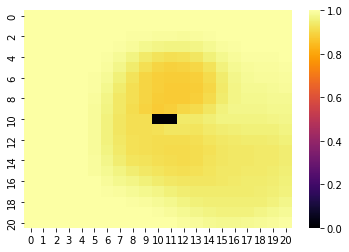

In [17]:
import seaborn as sns

sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

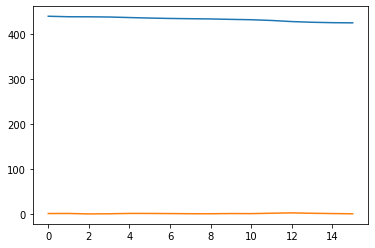

In [18]:
plt.plot(df_res[['Susceptibles', 'Infecteds']])

In [19]:
df_res

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,440.0000,1.0000,0.0000
1,0.058802,1.0,0.494838,1.0,438.8825,1.1175,1.0000
2,3.135673,2.0,0.339509,1.0,438.7560,0.1265,2.1175
3,0.712411,1.0,0.619429,2.0,438.3092,0.4468,2.2440
4,0.313996,1.0,0.97753,3.0,437.0829,1.2263,2.6908
5,4.306543,3.0,0.096433,1.0,435.9540,1.1289,3.9171
6,3.059836,2.0,0.744206,2.0,435.0631,0.8909,5.0460
7,5.640147,4.0,0.292499,1.0,434.5028,0.5603,5.9369
8,4.068061,3.0,0.298675,1.0,433.9857,0.5171,6.4972
9,5.635786,4.0,0.752473,2.0,433.0336,0.9521,7.0143


In [20]:
df_res2 = pd.read_csv('integrity_numpy.csv')

In [21]:
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,0.0,0.0,0.0007,-0.0007,0.0000
2,0.0,0.0,0.0,0.0,0.0022,-0.0015,-0.0007
3,0.0,0.0,0.0,0.0,0.0619,-0.0597,-0.0022
4,0.0,0.0,0.0,0.0,0.2539,-0.1920,-0.0619
5,0.0,0.0,0.0,0.0,0.4448,-0.1909,-0.2539
6,0.0,0.0,0.0,0.0,0.6834,-0.2386,-0.4448
7,0.0,0.0,0.0,0.0,0.8675,-0.1841,-0.6834
8,0.0,0.0,0.0,0.0,0.9679,-0.1004,-0.8675
9,0.0,0.0,0.0,0.0,1.0892,-0.1213,-0.9679


In [24]:
P[8:13, 8:13, 1]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0059, 0.0059, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]], dtype=torch.float64)

In [25]:
E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, tau=0.1)

In [37]:
E[6:14, 6:14, 1]

tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int8)

# 2. Probamos con $\Delta_{ID}=2$

## 2.1. Usamos $\tau=1$

In [38]:
N, K = 21, 15
n = 10**4

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, inc=2)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, inc=2)

    X += (E==0)*1
    df_res += df2
X = X/n
df_res = df_res/n

<AxesSubplot:>

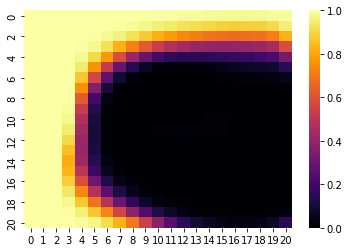

In [39]:
sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

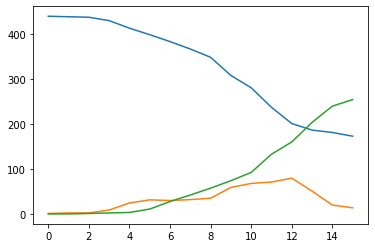

In [41]:
plt.plot(df_res[['Susceptibles', 'Infecteds', 'Deads']])

In [42]:
df_res2 = pd.read_csv('integrity_numpy_2.csv')

In [43]:
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,0.0,0.0,0.0007,-0.0007,0.0000
2,0.0,0.0,0.0,0.0,-0.0038,0.0038,0.0000
3,0.0,0.0,0.0,0.0,-0.0494,0.0501,-0.0007
4,0.0,0.0,0.0,0.0,-0.0173,0.0135,0.0038
5,0.0,0.0,0.0,0.0,0.1919,-0.2413,0.0494
6,0.0,0.0,0.0,0.0,0.3417,-0.3590,0.0173
7,0.0,0.0,0.0,0.0,0.3497,-0.1578,-0.1919
8,0.0,0.0,0.0,0.0,0.3620,-0.0203,-0.3417
9,0.0,0.0,0.0,0.0,0.5082,-0.1585,-0.3497


## 2.1. Usamos $\tau=0.1$

In [45]:
N, K = 21, 15
n = 10**4
tau = 0.1

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, inc=2, tau=tau)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, inc=2, tau=tau)

    X += (E==0)*1
    df_res += df2
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')

X = X/n
df_res = df_res/n

Epoch 100/10000
Epoch 200/10000
Epoch 300/10000
Epoch 400/10000
Epoch 500/10000
Epoch 600/10000
Epoch 700/10000
Epoch 800/10000
Epoch 900/10000
Epoch 1000/10000
Epoch 1100/10000
Epoch 1200/10000
Epoch 1300/10000
Epoch 1400/10000
Epoch 1500/10000
Epoch 1600/10000
Epoch 1700/10000
Epoch 1800/10000
Epoch 1900/10000
Epoch 2000/10000
Epoch 2100/10000
Epoch 2200/10000
Epoch 2300/10000
Epoch 2400/10000
Epoch 2500/10000
Epoch 2600/10000
Epoch 2700/10000
Epoch 2800/10000
Epoch 2900/10000
Epoch 3000/10000
Epoch 3100/10000
Epoch 3200/10000
Epoch 3300/10000
Epoch 3400/10000
Epoch 3500/10000
Epoch 3600/10000
Epoch 3700/10000
Epoch 3800/10000
Epoch 3900/10000
Epoch 4000/10000
Epoch 4100/10000
Epoch 4200/10000
Epoch 4300/10000
Epoch 4400/10000
Epoch 4500/10000
Epoch 4600/10000
Epoch 4700/10000
Epoch 4800/10000
Epoch 4900/10000
Epoch 5000/10000
Epoch 5100/10000
Epoch 5200/10000
Epoch 5300/10000
Epoch 5400/10000
Epoch 5500/10000
Epoch 5600/10000
Epoch 5700/10000
Epoch 5800/10000
Epoch 5900/10000
Epoch 

<AxesSubplot:>

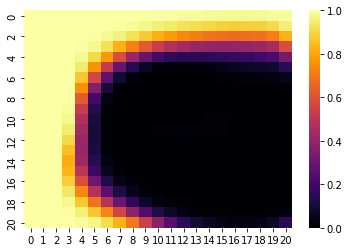

In [46]:
sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

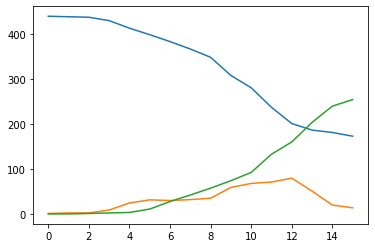

In [47]:
plt.plot(df_res[['Susceptibles', 'Infecteds', 'Deads']])

## 2.3. Usamos $\tau = 10^5$

In [48]:
N, K = 21, 15
n = 10**4
tau = 10**5

E, P, df2 = SpreadModel(seed_value=0, N=N, K=K, input=True, data=df, inc=2, tau=tau)
X = (E==0)*1
df_res = df2.copy()

for seed in range(1, n):

    E, P, df2 = SpreadModel(seed_value=seed, N=N, K=K, input=True, data=df, inc=2, tau=tau)

    X += (E==0)*1
    df_res += df2
    if seed % 100 == 0:
        print(f'Epoch {seed}/{n}')

X = X/n
df_res = df_res/n

Epoch 100/10000
Epoch 200/10000
Epoch 300/10000
Epoch 400/10000
Epoch 500/10000
Epoch 600/10000
Epoch 700/10000
Epoch 800/10000
Epoch 900/10000
Epoch 1000/10000
Epoch 1100/10000
Epoch 1200/10000
Epoch 1300/10000
Epoch 1400/10000
Epoch 1500/10000
Epoch 1600/10000
Epoch 1700/10000
Epoch 1800/10000
Epoch 1900/10000
Epoch 2000/10000
Epoch 2100/10000
Epoch 2200/10000
Epoch 2300/10000
Epoch 2400/10000
Epoch 2500/10000
Epoch 2600/10000
Epoch 2700/10000
Epoch 2800/10000
Epoch 2900/10000
Epoch 3000/10000
Epoch 3100/10000
Epoch 3200/10000
Epoch 3300/10000
Epoch 3400/10000
Epoch 3500/10000
Epoch 3600/10000
Epoch 3700/10000
Epoch 3800/10000
Epoch 3900/10000
Epoch 4000/10000
Epoch 4100/10000
Epoch 4200/10000
Epoch 4300/10000
Epoch 4400/10000
Epoch 4500/10000
Epoch 4600/10000
Epoch 4700/10000
Epoch 4800/10000
Epoch 4900/10000
Epoch 5000/10000
Epoch 5100/10000
Epoch 5200/10000
Epoch 5300/10000
Epoch 5400/10000
Epoch 5500/10000
Epoch 5600/10000
Epoch 5700/10000
Epoch 5800/10000
Epoch 5900/10000
Epoch 

<AxesSubplot:>

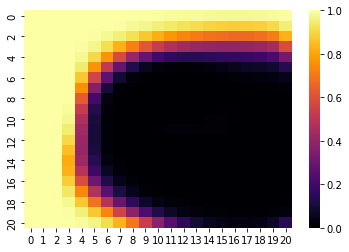

In [49]:
sns.heatmap(X[:, :, -1], vmin=0, vmax=1, cmap='inferno')

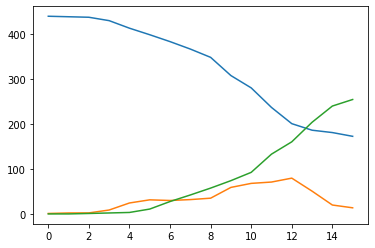

In [50]:
plt.plot(df_res[['Susceptibles', 'Infecteds', 'Deads']])

In [51]:
df_res2 = pd.read_csv('integrity_numpy_2.csv')
df_res - df_res2

,Theta,Quadrant,Rho,m,Susceptibles,Infecteds,Deads
0,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
1,0.0,0.0,0.0,0.0,0.0006,-0.0006,0.0000
2,0.0,0.0,0.0,0.0,-0.0041,0.0041,0.0000
3,0.0,0.0,0.0,0.0,-0.0572,0.0578,-0.0006
4,0.0,0.0,0.0,0.0,-0.0447,0.0406,0.0041
5,0.0,0.0,0.0,0.0,0.1422,-0.1994,0.0572
6,0.0,0.0,0.0,0.0,0.2637,-0.3084,0.0447
7,0.0,0.0,0.0,0.0,0.2441,-0.1019,-0.1422
8,0.0,0.0,0.0,0.0,0.2275,0.0362,-0.2637
9,0.0,0.0,0.0,0.0,0.3150,-0.0709,-0.2441
